<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/MultiOscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Multiple Phase-Shifted Oscillators</h1></b>

Dr. Bingsen Wang

11/9/2024
</center>

#Python Code


0
0
100
200
300
400
500
600
700
800
900
0


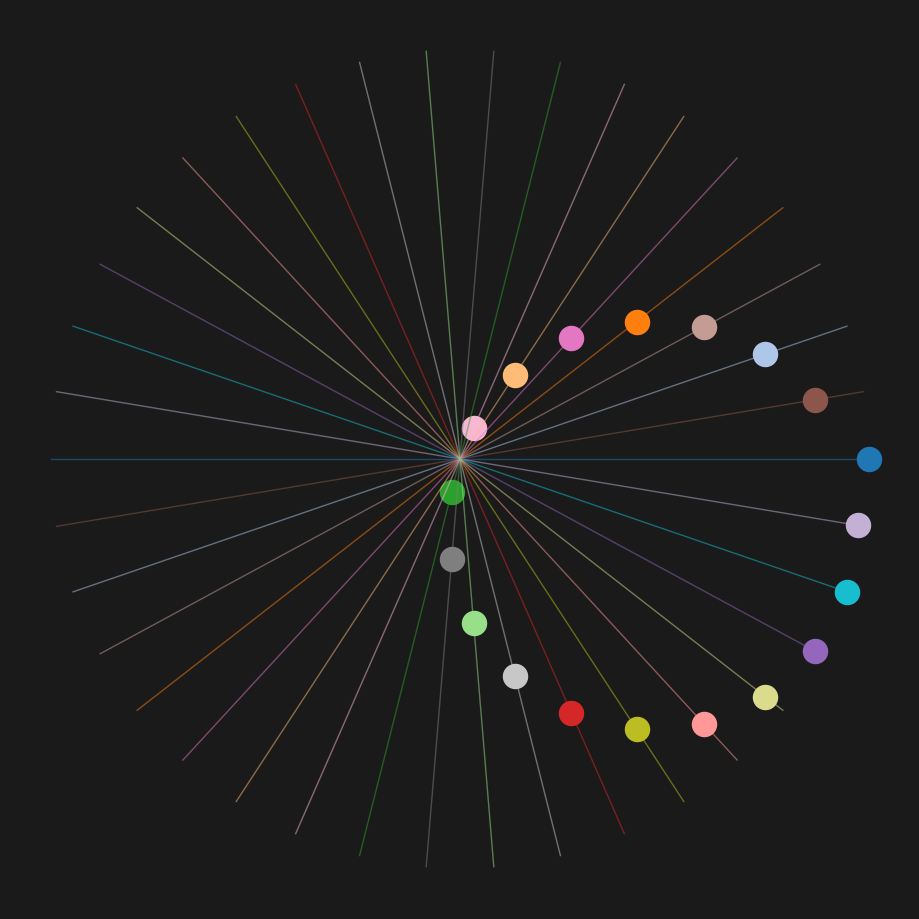

In [55]:
from numpy import linspace,cos,sin,arccos,pi,abs,sqrt,exp
from math import factorial
from matplotlib import animation,pyplot,cm,transforms
pyplot.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})
def y(x,n):
  return [cos(x-k*2*pi/n) for k in range(1,n+1)]
Nf=10
x = linspace(0,2*pi,100)
y_lst=[y(x,n) for n in range(1,2*Nf+1,2)]
clst = list(cm.tab20.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]),facecolor='.1')
ax = fig.add_axes((0,0,1,1),xlim=[-1.1,1.1], ylim=[-1.1,1.1],fc='none')
ax.axis('off')
dots = [ax.scatter([],[],marker='o',s=300,color=clst[i%len(clst)]) for i in range(2*Nf+1)]
lines =[ax.plot([],[],'-',lw=1,color=clst[i%len(clst)],alpha=.5)[0] for i in range(2*Nf+1)]
def animate(ii):
  # i=0
  i=ii%len(x)
  k=ii//len(x)
  if i==0:
    print(ii)
    for j in range(2*k+1):
      lines[j].set_data([-1,1],[0,0])
      rot= transforms.Affine2D().rotate_deg(360*j/(2*k+1))+ax.transData
      lines[j].set_transform(rot)
      p = y_lst[k][j][i]*exp(1j*j/(2*k+1)*2*pi)
      dots[j].set_offsets([p.real,p.imag])
  else:
    for j in range(2*k+1):
      p = y_lst[k][j][i]*exp(1j*j/(2*k+1)*2*pi)
      dots[j].set_offsets([p.real,p.imag])
  return
anim = animation.FuncAnimation(fig, animate, frames=len(x)*Nf, interval=50)
# anim
anim.save("MultiOscillator.mp4", writer=animation.FFMpegWriter(fps=50), dpi = 200)